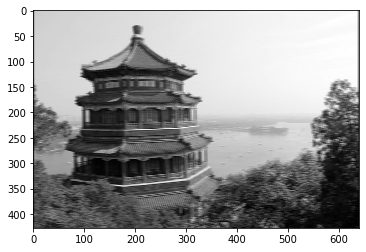

In [10]:
from sklearn.datasets import load_sample_image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 샘플 이미지 로드
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 필터 2개 생성
filters = np.zeros(shape = (7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1 # 수직선
filters[3, :, :, 1] = 1 # 수평선

outputs = tf.nn.conv2d(images, filters, strides = 1, padding = "SAME")

plt.imshow(outputs[0, :, :, 1], cmap = "gray")
plt.show()

In [ ]:
# 3 * 3 크기의 32개의 필터와 (수평과 수직 방향으로) 스트라이드 1. "same" 패딩을 사용하는 Conv2D 층을 만들고 출력을 위해 ReLU 활성화 함수를 적용
conv = keras.layers.Conv2D(filters =32,
                           kernel_size = 3,
                           strides = 1,
                           padding = 'same',
                           activation = 'relu')

In [ ]:
# 큰 커널을 사용하는 것은 좋지 않다. 단 첫번째 합성곱 층 예외
# 출력층에 다다를수록 필터 수 증가 풀링 층 다음에 필터 개수를 두 배로 늘리는 것이 일반적인 방법.
#
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])